## Imports

In [40]:
import requests
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pytz
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Availible Sensors

In [19]:
locations = ['1) Coastal Endurance Oregon Shelf Surface Piercing Profiler Mooring',
            '2) Coastal Endurance Oregon Offshore Cabled Shallow Profiler Mooring',
            '3) Coastal Endurance Oregon Offshore Cabled Deep Profiler Mooring',
            '4) Cabled Array Oregon Slope Base Shallow Profiler',
            '5) Cabled Array Oregon Slope Base Deep Profiler',
            '6) Cabled Array Axial Base Shallow Profiler',
            '7) Cabled Array Axial Base Deep Profiler']

In [20]:
sensors = ['CE02SHSP/SP001/08-CTDPFJ000/recovered_cspp/ctdpf_j_cspp_instrument_recovered?',
          'CE04OSPS/SF01B/2A-CTDPFA107/streamed/ctdpf_sbe43_sample?',
          'CE04OSPD/DP01B/01-CTDPFL105/recovered_wfp/dpc_ctd_instrument_recovered?',
          'RS01SBPS/SF01A/2A-CTDPFA102/streamed/ctdpf_sbe43_sample?',
          'RS01SBPD/DP01A/01-CTDPFL104/recovered_inst/dpc_ctd_instrument_recovered?',
          'RS03AXPS/SF03A/2A-CTDPFA302/streamed/ctdpf_sbe43_sample?',
          'RS03AXPD/DP03A/01-CTDPFL304/recovered_inst/dpc_ctd_instrument_recovered?']

## User Input

In [21]:
print('Please input the number for one of the locations listed below:')
for i in range(len(locations)):
    print('\t' + locations[i])
key_input = int(input())
user_int = key_input -1
print('You have selected: '+ locations[calling_int])
print('Please input a start and end date relative to PST')
print('Example: 2019-07-25')
startDate = input()
endDate = input()
print('Please input a start and end time in PST')
print('Example: 19:54:46.373')
startTime = input()
endTime = input()

Please input the number for one of the locations listed below:
	1) Coastal Endurance Oregon Shelf Surface Piercing Profiler Mooring
	2) Coastal Endurance Oregon Offshore Cabled Shallow Profiler Mooring
	3) Coastal Endurance Oregon Offshore Cabled Deep Profiler Mooring
	4) Cabled Array Oregon Slope Base Shallow Profiler
	5) Cabled Array Oregon Slope Base Deep Profiler
	6) Cabled Array Axial Base Shallow Profiler
	7) Cabled Array Axial Base Deep Profiler
3
You have selected: 3) Coastal Endurance Oregon Offshore Cabled Deep Profiler Mooring
Please input a start and end date relative to PST
Example: 2019-07-25
2015-12-20
2015-12-21
Please input a start and end time in PST
Example: 19:54:46.373
19:54:46.000
19:54:46.000


## URL Builder

In [22]:
USERNAME ='OOIAPI-9O3OUL6L1FJHJL'
TOKEN= 'DI74QJTYAXB'
DATA_API_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

In [23]:
year = startDate[:4]
year=int(year)
month=startDate[5:-3]
month=int(month)
day = startDate[8:]
day = int(day)
hour = startTime[:2]
hour = int(hour)
minute = startTime[3:-7]
minute = int(minute)
second = startTime[6:-4]
second = int(second)
utc_timezone = pytz.timezone("UTC")
pst_timezone = pytz.timezone("US/Pacific")
time = pst_timezone.localize(datetime.datetime(year, month, day, hour, minute, second)).astimezone(utc_timezone)
time = str(time)
startDate = time[:10]
startTime = time[11:-6]+startTime[-4:]

year = endDate[:4]
year=int(year)
month=endDate[5:-3]
month=int(month)
day = endDate[8:]
day = int(day)
hour = endTime[:2]
hour = int(hour)
minute = endTime[3:-7]
minute = int(minute)
second = endTime[6:-4]
second = int(second)
utc_timezone = pytz.timezone("UTC")
pst_timezone = pytz.timezone("US/Pacific")
time = pst_timezone.localize(datetime.datetime(year, month, day, hour, minute, second)).astimezone(utc_timezone)
time = str(time)
endDate = time[:10]
endTime = time[11:-6]+startTime[-4:]

In [24]:
def URL_Builder(location,startDate,endDate,startTime,endTime):
    

    data_request_url = DATA_API_BASE_URL+\
                    location+\
                    'beginDT='+\
                    startDate+\
                    'T'+\
                    startTime+\
                    'Z&'+\
                    'endDT='+\
                    endDate+\
                    'T'+\
                    endTime+\
                    'Z&'+\
                    'limit=1000'
    return data_request_url

In [59]:
URL_Finder = URL_Builder(sensors[user_int],startDate,endDate,startTime,endTime)
r = requests.get(URL_Finder, auth=(USERNAME, TOKEN))
data = r.json()
data = pd.DataFrame(data)
print('If no data appears, please try inputting a different date and time')
data

If no data appears, please try inputting a different date and time


,practical_salinity,conductivity_millisiemens,dpc_ctd_seawater_conductivity_qc_executed,density_qc_executed,driver_timestamp,practical_salinity_qc_results,density,dpc_ctd_seawater_conductivity,internal_timestamp,pk,...,pressure_qc_executed,preferred_timestamp,temp_qc_executed,temp,dpc_ctd_seawater_conductivity_qc_results,practical_salinity_qc_executed,temp_qc_results,conductivity_millisiemens_qc_results,density_qc_results,time
0,34.157547,33.080898,29,29,3.724599e+09,29,1029.664985,3.30809,3.659659e+09,"{'node': 'DP01B', 'stream': 'dpc_ctd_instrumen...",...,29,internal_timestamp,29,5.1074,29,29,29,0,29,3.659659e+09
1,34.157406,33.080700,29,29,3.724599e+09,29,1029.659344,3.30807,3.659659e+09,"{'node': 'DP01B', 'stream': 'dpc_ctd_instrumen...",...,29,internal_timestamp,29,5.1079,29,29,29,0,29,3.659659e+09
2,34.156951,33.081902,29,29,3.724599e+09,29,1029.652142,3.30819,3.659659e+09,"{'node': 'DP01B', 'stream': 'dpc_ctd_instrumen...",...,29,internal_timestamp,29,5.1104,29,29,29,0,29,3.659659e+09
3,34.157225,33.080700,29,29,3.724599e+09,29,1029.645723,3.30807,3.659659e+09,"{'node': 'DP01B', 'stream': 'dpc_ctd_instrumen...",...,29,internal_timestamp,29,5.1095,29,29,29,0,29,3.659659e+09
4,34.156517,33.080101,29,29,3.724599e+09,29,1029.638737,3.30801,3.659659e+09,"{'node': 'DP01B', 'stream': 'dpc_ctd_instrumen...",...,29,internal_timestamp,29,5.1102,29,29,29,0,29,3.659659e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,34.144821,33.167500,29,29,3.724599e+09,29,1029.592262,3.31675,3.659741e+09,"{'node': 'DP01B', 'stream': 'dpc_ctd_instrumen...",...,29,internal_timestamp,29,5.2226,29,29,29,0,29,3.659741e+09
3292,34.144720,33.167198,29,29,3.724599e+09,29,1029.606037,3.31672,3.659741e+09,"{'node': 'DP01B', 'stream': 'dpc_ctd_instrumen...",...,29,internal_timestamp,29,5.2209,29,29,29,0,29,3.659741e+09
3293,34.144733,33.166100,29,29,3.724599e+09,29,1029.619940,3.31661,3.659741e+09,"{'node': 'DP01B', 'stream': 'dpc_ctd_instrumen...",...,29,internal_timestamp,29,5.2182,29,29,29,0,29,3.659741e+09
3294,34.144224,33.166100,29,29,3.724599e+09,29,1029.621382,3.31661,3.659741e+09,"{'node': 'DP01B', 'stream': 'dpc_ctd_instrumen...",...,29,internal_timestamp,29,5.2185,29,29,29,0,29,3.659741e+09


## Timezone Conversion

In [27]:
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()


def ntp_seconds_to_datetime(ntp_seconds):
    timestamp = datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
    utc_timezone = pytz.timezone("UTC")
    pst_timezone = pytz.timezone("US/Pacific")
    time = utc_timezone.localize(timestamp).astimezone(pst_timezone)
    return time

## Dive Counter

In [28]:
def getNumberOfDives(depth):
    
    bottom = max(depth)
    atBottom = False
    diveCount = 0
    
    for i in range(0, len(depth)):
        
        if(depth[i] > 0.95*bottom and not atBottom):
            atBottom = True
        
        if(depth[i] < 0.95*bottom and atBottom):
            atBottom = False
            diveCount += 1
    
    return diveCount

## Calling to Columns

In [29]:
header = data.columns
titles = []

In [30]:
for i in range(len(header)):
    if header[i] == 'seawater_temperature':
        titles.append(header[i])
    elif header[i] == 'temp':
        titles.append(header[i])
    elif header[i] == 'temperature':
        titles.append(header[i])
    elif header[i] == 'seawater_pressure':
        titles.append(header[i])
    elif header[i] == 'pressure':
        titles.append(header[i])
    elif header[i] == 'salinity':
        titles.append(header[i])
    elif header[i] == 'practical_salinity':
        titles.append(header[i])
    elif header[i] == 'time':
        titles.append(header[i])
titles

['practical_salinity', 'pressure', 'temp', 'time']

In [31]:
location_time = []
location_temp = []
location_pressure = []
location_salinity = []

In [32]:
for i in range(len(titles)):
    if titles[i] == 'time':
        location_time.append(i)
    elif titles[i] == 'temp' or titles[i] == 'seawater_temperature' or  titles[i] == 'temperature':
        location_temp.append(i)
    elif titles[i] == 'seawater_pressure' or titles[i] == 'pressure':
        location_pressure.append(i)
    elif titles[i] == 'salinity' or titles[i] == 'practical_salinity':
        location_salinity.append(i)

## Plot Titles

In [33]:
title_sensor = ['Coastal Endurance OSSPPM',
            'Coastal Endurance OOCSPM',
            'Coastal Endurance OOCDPM',
            'Cabled Array OSBSP',
            'Cabled Array OSBDP',
            'Cabled Array ABSP',
            'Cabled Array ABDP']
sensor = title_sensor[user_int]

In [34]:
if 3 < month < 10:
    season = 'Summer'
else:
    season = 'Winter'

## Assigning Plot Values

In [46]:
t = []
T = []
s = []
z = []

In [47]:
countTemp = 0
countPressure = 0
countSalinity = 0

In [48]:
for i in range(len(data)):
    t.append(ntp_seconds_to_datetime(data[titles[location_time[0]]][i]))
   
    T.append(data[titles[location_temp[countTemp]]][i])
    if T[i] > 36:
        countTemp += 1
        T[i] = data[titles[location_temp[countTemp]]][i]
       
    z.append(data[titles[location_pressure[countPressure]]][i])
    if z[i] > 10994:
        countPressure += 1
        z[i] = data[titles[location_pressure[countPressure]]][i]
   
    s.append(data[titles[location_salinity[countSalinity]]][i])
    if s[i] > 50:
        countSalinity += 1
        s[i] = data[titles[location_salinity[countSalinity]]][i]

In [49]:
ssp=[0 for x in range(len(T))]
for i in range(len(T)):
    ssp[i]=1449.2+(4.6*T[i])-(0.055*(T[i]*T[i]))+(0.00029*(T[i]*T[i]*T[i]))+((1.34-(0.01*T[i]))*(s[i]-35))+(0.016*z[i])

## Plotting

Residuals From Error:
[396.46902008]


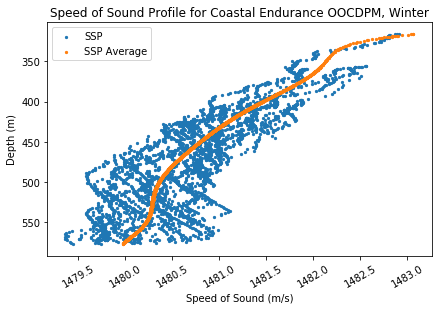

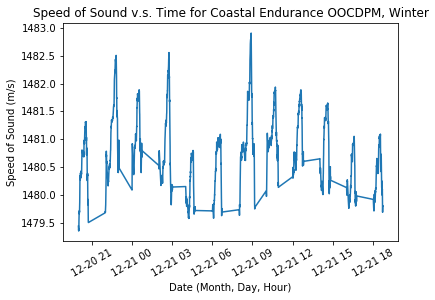

Number of Dives: 
12


In [62]:
poly = np.polyfit(z,ssp,8,full = True)
poly1 = np.polyfit(z, ssp, 8)
poly_ssp = np.poly1d(poly[0])(z)

print('Residuals From Error:')
print(poly[1])

plt.scatter(ssp, z, s=5)
plt.scatter(poly_ssp, z, s=5)
plt.gca().invert_yaxis()
plt.xticks(rotation = 30)
plt.tight_layout()
plt.ylabel('Depth (m)')
plt.xlabel('Speed of Sound (m/s)')
plt.title('Speed of Sound Profile for '+sensor+', '+season)
plt.gca().legend(('SSP','SSP Average'))
plt.show()

plt.plot(t,ssp)
plt.xticks(rotation = 30)
plt.title('Speed of Sound v.s. Time for '+sensor+', '+season)
plt.xlabel('Date (Month, Day, Hour)')
plt.ylabel('Speed of Sound (m/s)')
plt.show()

dives=getNumberOfDives(z)
print('Number of Dives: ')
print(dives)